In [140]:
from dataclasses import dataclass, field
from typing import List
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True
from rdkit.Chem import rdmolfiles, rdmolops, AllChem
from rdkit.Chem.Scaffolds import MurckoScaffold
from collections import defaultdict
import itertools
import numpy as np
import dgl.backend as F
from enum import Enum, unique
from rdkit.Chem import BondType
import dgl
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
def addAtomIndices(mol):
    for i, a in enumerate(mol.GetAtoms()):
        a.SetAtomMapNum(i)


In [280]:
list("abcdef")

['a', 'b', 'c', 'd', 'e', 'f']

In [141]:
df = pd.read_csv("/BiO/pekim/GRAPHNET/data/normalised_filtered_data.csv")
#df.loc[19401, "smiles"] = "CS(C)=C1C(=O)NC(=O)N(c2ccccc2)C1=O"
#df.to_csv("/BiO/pekim/GRAPHNET/data/normalised_filtered_data.csv", index=None)

In [ ]:
df.loc[51601:].to_csv("/BiO/pekim/GRAPHNET/data/test.csv", index=None)

In [ ]:
test = df[df.smiles.str.contains("\[S\+\]")]
test2 = df.loc[19401:19401+1]
test = pd.concat([test, test2], axis=0)
test.to_csv("/BiO/pekim/GRAPHNET/data/tricky.csv", index=None)
#df.to_csv("/BiO/pekim/GRAPHNET/data/normalised_filtered_data.csv", index=None)
#df.loc[5631]

In [136]:
df[df.ID=="STOCK2S-60571"]

,ID,smiles,clogp,tpsa,mw,scaffold_clogp,scaffold_tpsa,scaffold_mw
85771,STOCK2S-60571,O=C(NC[PH](=O)O)OCc1ccccc1,-1.798467,-0.056539,-1.995237,-0.970532,-3.048089,-3.867434


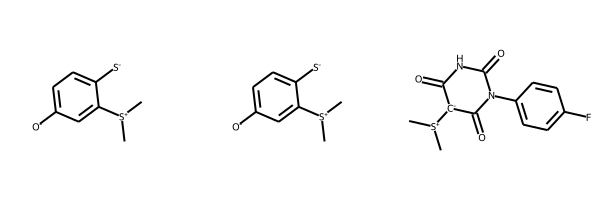

In [299]:
from rdkit.Chem.Draw import MolsToGridImage
IPythonConsole.drawOptions.useBWAtomPalette()
mol = Chem.MolFromSmiles("C[S+](C)c1cc([O-])ccc1[S-]")
#Chem.rdmolops.Kekulize(mol)
neutralise = charge.Uncharger()

mol = neutralise(mol)
mol.UpdatePropertyCache(strict=False)
Chem.rdmolops.SanitizeMol(mol3)
#mol2 = Chem.MolFromSmiles("C[S+](C)[c-]1c(=O)[nH]c(=O)n(-c2ccc(F)cc2)c1=O")
#Chem.rdmolops.Kekulize(mol2)
#Chem.rdmolops.SanitizeMol(mol2)
from molvs import Standardizer, charge
core = MurckoScaffold.GetScaffoldForMol(mol2)
#mol = Chem.MolFromSmiles("CCOc1ccc(-n2c(=O)[nH]c(=O)[c-]([S+](C)C)c2=O)cc1")
def addAtomIndices(mol):
    for i, a in enumerate(mol.GetAtoms()):
        a.SetAtomMapNum(i)
MolsToGridImage((mol,mol3,mol2))


In [ ]:

test = pd.concat([df[df.smiles.str.contains("\[S\+\]")], df.loc[19401]], axis=0)
test.to_csv("/BiO/pekim/GRAPHNET/data/tricky.csv", index=None)

In [ ]:
from cl_graph_multi_batch import ScaffoldGNN
from cl_featuriser import AtomFeaturiser, BondFeaturiser
from cl_dataset_multi_batch import MolGraphData
import torch.nn as nn
import torch
import pandas as pd

In [231]:
#mol = Chem.MolFromSmiles("[NH2+]=C1C([N+](=O)[O-])=C([O-])c2ccccc21")
pt = Chem.GetPeriodicTable()
for i, at in enumerate(mol.GetAtoms()):
    print(i,at.GetSymbol(), [j.GetBondType() for j in at.GetBonds()],at.GetAtomicNum(),at.GetFormalCharge(), at.GetNumExplicitHs(),at.GetExplicitValence(), at.GetTotalValence(), at.GetTotalNumHs(),pt.GetDefaultValence(at.GetAtomicNum()))
    at = mol2.GetAtomWithIdx(i)
    print(i,at.GetSymbol(), [j.GetBondType() for j in at.GetBonds()],at.GetAtomicNum(),at.GetFormalCharge(), at.GetNumExplicitHs(),at.GetExplicitValence(), at.GetTotalValence(),at.GetTotalNumHs(), pt.GetDefaultValence(at.GetAtomicNum()))
#Chem.rdmolops.SanitizeMol(mol, sanitizeOps=Chem.SanitizeFlags.SANITIZE_KEKULIZE)

#print(mol)

0 C [rdkit.Chem.rdchem.BondType.SINGLE] 6 0 0 1 4 3 4
0 C [rdkit.Chem.rdchem.BondType.AROMATIC, rdkit.Chem.rdchem.BondType.AROMATIC] 6 0 0 3 4 1 4
1 C [rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.SINGLE] 6 0 0 2 4 2 4
1 C [rdkit.Chem.rdchem.BondType.AROMATIC, rdkit.Chem.rdchem.BondType.AROMATIC] 6 0 0 3 4 1 4
2 C [rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.SINGLE] 6 0 0 2 4 2 4
2 C [rdkit.Chem.rdchem.BondType.AROMATIC, rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.AROMATIC] 6 0 0 4 4 0 4
3 C [rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.SINGLE] 6 0 0 2 4 2 4
3 O [rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.SINGLE] 8 0 0 2 2 0 2
4 C [rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.SINGLE] 6 0 0 2 4 2 4
4 C [rdkit.Chem.rdchem.BondType.SINGLE] 6 0 0 1 4 3 4
5 C [rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.SINGLE] 6 0 0 2 4 2 4
5 C [rdkit.Chem.rdchem.BondType.AROMATIC, rd

In [ ]:

core = Chem.MolFromSmiles("c1ccccc1[NH3+]")
for at in core.GetAtoms():
    print([t.GetBondType() for t in at.GetBonds()])
Chem.rdmolops.Kekulize(core, True)
Chem.rdmolops.SanitizeMol(core)
for at in core.GetAtoms():
    print([t.GetBondType() for t in at.GetBonds()])
core = s(core)
MolsToGridImage((core,core, mol_c), subImgSize=(600, 300))

In [ ]:
mol2 = Chem.MolFromSmiles("CCOc1ccc(-n2c(=O)[nH]c(=O)[c-]([S+](C)C)c2=O)cc1")
Chem.rdmolops.RemoveHs(mol2)
mol1 = Chem.MolFromSmiles("CCOc1ccc(N2C(=O)NC(=O)C([SH](C)C)C2=O)cc1")
MolsToGridImage((mol1, mol2))
for i in mol.GetAtoms():
    print(i.GetSymbol(),[t.GetBondType() for t in i.GetBonds()],i.GetFormalCharge(),i.GetNumExplicitHs(), i.GetTotalValence(), pt.GetDefaultValence(i.GetAtomicNum()))
Chem.MolToSmiles(mol2)

In [158]:
pt.GetDefaultValence(10)

0

In [ ]:
for at in mol1.GetAtoms():
    atomic_num = at.GetAtomicNum()
    if at.GetFormalCharge() != 0:
        if at.GetNeighbors().__len__() ==1:
            if atomic_num == 8 and at.GetBonds()[0].GetBondType() == Chem.rdchem.BondType.SINGLE:
                at.SetFormalCharge(0)
        elif atomic_num == 7:
            if at.GetBonds()[0].GetBondType() == Chem.rdchem.BondType.DOUBLE:
                at.SetFormalCharge(0)
            if at.GetBonds()[0].GetBondType() == Chem.rdchem.BondType.SINGLE and at.GetNumExplicitHs() == 3:
                at.SetNumExplicitHs(0)
                at.SetFormalCharge(0)
        elif atomic_num  == 16:
            if at.GetBonds()[0].GetBondType() == Chem.rdchem.BondType.SINGLE:
                at.SetFormalCharge(0)
                at.SetNumExplicitHs(1)
        elif atomic_num == 6:
            fc = [nat.GetFormalCharge() for nat in at.GetNeighbors()]
            print(fc)
            if at.GetFormalCharge() == -1 and 1 not in fc:
                at.SetFormalCharge(0)
                at.SetNumExplicitHs(1)
print(Chem.MolToSmiles(mol1))
CCCCCCN1C(=O)NC(=O)C([SH](CCCC)CCCC)C1=O
CCCCCCn1c(=O)[nH]c(=O)[c-]([S+](CCCC)CCCC)c1=O

In [262]:
mol1 = Chem.MolFromSmiles("CCOc1ccc(-n2c(=O)[nH]c(=O)[c-]([S+](C)C)c2=O)cc1")
mol2 = Chem.MolFromSmiles("CCOc1ccc(N2C(=O)NC(=O)C([S+](C)C)C2=O)cc1")
#Chem.rdmolops.Kekulize(mol2)
#Chem.rdmolops.SanitizeMol(mol2)
core = MurckoScaffold.GetScaffoldForMol(mol2)
print(Chem.MolToSmiles(core))
print(mol2.GetSubstructMatches(core))
mol1.UpdatePropertyCache(strict=False)
for i in range(mol1.GetNumAtoms()):
    at = mol1.GetAtomWithIdx(i)
    #print(i,at.GetSymbol(), at.GetFormalCharge(), at.GetNumExplicitHs(),at.GetExplicitValence(), at.GetTotalValence(),len([i.GetBondType() for i in at.GetBonds()]))
    print(i,at.GetSymbol(),at.GetFormalCharge(), [j.GetBondType() for j in at.GetBonds()])
    at = mol2.GetAtomWithIdx(i)
    #print(i,at.GetSymbol(), at.GetFormalCharge(), at.GetNumExplicitHs(),at.GetExplicitValence(), at.GetTotalValence(),len([i.GetBondType() for i in at.GetBonds()]))
    #at = core.GetAtomWithIdx(i)
    print(i,at.GetSymbol(),at.GetFormalCharge(), [j.GetBondType() for j in at.GetBonds()])
    #print(i,at.GetSymbol(), at.GetFormalCharge(), at.GetNumExplicitHs(),at.GetExplicitValence(), [i.GetBondType() for i in at.GetBonds()])

O=C1CC(=O)N(c2ccccc2)C(=O)N1
((3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 17, 18, 19, 20),)
0 C 0 [rdkit.Chem.rdchem.BondType.SINGLE]
0 C 0 [rdkit.Chem.rdchem.BondType.SINGLE]
1 C 0 [rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.SINGLE]
1 C 0 [rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.SINGLE]
2 O 0 [rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.SINGLE]
2 O 0 [rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.SINGLE]
3 C 0 [rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.AROMATIC, rdkit.Chem.rdchem.BondType.AROMATIC]
3 C 0 [rdkit.Chem.rdchem.BondType.SINGLE, rdkit.Chem.rdchem.BondType.AROMATIC, rdkit.Chem.rdchem.BondType.AROMATIC]
4 C 0 [rdkit.Chem.rdchem.BondType.AROMATIC, rdkit.Chem.rdchem.BondType.AROMATIC]
4 C 0 [rdkit.Chem.rdchem.BondType.AROMATIC, rdkit.Chem.rdchem.BondType.AROMATIC]
5 C 0 [rdkit.Chem.rdchem.BondType.AROMATIC, rdkit.Chem.rdchem.BondType.AROMATIC]
5 C 0 [rdkit.Chem.rdchem.BondType.AROMATIC, rdk

In [105]:
df1 = df[~df.smiles.str.contains("\[S\+\]")& ~df.smiles.str.contains("\[c\-\]")]
df1.to_csv("/BiO/pekim/GRAPHNET/data/normalised_filtered_data.csv", index=None)

In [278]:
from cl_featuriser import AtomFeaturiser, BondFeaturiser
data = MolGraphData("/BiO/pekim/GRAPHNET/data/tricky.csv", AtomFeaturiser(),BondFeaturiser(), ["clogp","mw","tpsa"])
for j,i in enumerate(range(data.__len__())):
    g,gs,_,_,_,id_, smi_i = data.__getitem__(i)
    _, smi_o = dgl_to_mol(g)
    #_, smi_o = dgl_to_mol_isomer(g)
    print(j,id_,"------------------")
    print(smi_o)
    #mol1 = Chem.MolFromSmiles(smi)
    mol = Chem.MolFromSmiles(smi_i)
    smi_i = Chem.MolToSmiles(mol, isomericSmiles=False)
    print(smi_i)
    print("--------------")
    

0 C fc 0 exh 0 th 1 exv 3 tv 4 4
1 C fc 0 exh 0 th 0 exv 4 tv 4 4
2 O fc 0 exh 0 th 0 exv 2 tv 2 2
3 N fc 0 exh 0 th 1 exv 2 tv 3 3
4 C fc 0 exh 0 th 0 exv 4 tv 4 4
5 O fc 0 exh 0 th 0 exv 2 tv 2 2
6 N fc 0 exh 0 th 0 exv 3 tv 3 3
7 C fc 0 exh 0 th 0 exv 4 tv 4 4
8 C fc 0 exh 0 th 1 exv 3 tv 4 4
9 C fc 0 exh 0 th 1 exv 3 tv 4 4
10 C fc 0 exh 0 th 1 exv 3 tv 4 4
11 C fc 0 exh 0 th 1 exv 3 tv 4 4
12 C fc 0 exh 0 th 1 exv 3 tv 4 4
13 C fc 0 exh 0 th 0 exv 4 tv 4 4
14 O fc 0 exh 0 th 0 exv 2 tv 2 2
15 C fc 0 exh 0 th 3 exv 1 tv 4 4
16 S fc 1 exh 0 th 0 exv 3 tv 3 2
17 C fc 0 exh 0 th 3 exv 1 tv 4 4
0 STOCK1S-24894 ------------------
C[S+](C)C1C(=O)NC(=O)N(c2ccccc2)C1=O
C[S+](C)[c-]1c(=O)[nH]c(=O)n(-c2ccccc2)c1=O
--------------
0 C fc 0 exh 0 th 0 exv 4 tv 4 4
1 C fc 0 exh 0 th 1 exv 3 tv 4 4
2 C fc 0 exh 0 th 1 exv 3 tv 4 4
3 C fc 0 exh 0 th 0 exv 4 tv 4 4
4 N fc 0 exh 0 th 0 exv 3 tv 3 3
5 C fc 0 exh 0 th 0 exv 4 tv 4 4
6 O fc 0 exh 0 th 0 exv 2 tv 2 2
7 N fc 0 exh 0 th 1 exv 2 tv 3 3
8 C

0 C fc 0 exh 0 th 1 exv 3 tv 4 4
1 C fc 0 exh 0 th 0 exv 4 tv 4 4
2 O fc 0 exh 0 th 0 exv 2 tv 2 2
3 N fc 0 exh 0 th 1 exv 2 tv 3 3
4 C fc 0 exh 0 th 0 exv 4 tv 4 4
5 O fc 0 exh 0 th 0 exv 2 tv 2 2
6 N fc 0 exh 0 th 0 exv 3 tv 3 3
7 C fc 0 exh 0 th 0 exv 4 tv 4 4
8 C fc 0 exh 0 th 1 exv 3 tv 4 4
9 C fc 0 exh 0 th 1 exv 3 tv 4 4
10 C fc 0 exh 0 th 1 exv 3 tv 4 4
11 C fc 0 exh 0 th 0 exv 4 tv 4 4
12 C fc 0 exh 0 th 1 exv 3 tv 4 4
13 C fc 0 exh 0 th 0 exv 4 tv 4 4
14 O fc 0 exh 0 th 0 exv 2 tv 2 2
15 C fc 0 exh 0 th 3 exv 1 tv 4 4
16 C fc 0 exh 0 th 2 exv 2 tv 4 4
17 C fc 0 exh 0 th 2 exv 2 tv 4 4
18 C fc 0 exh 0 th 2 exv 2 tv 4 4
19 S fc 1 exh 0 th 0 exv 3 tv 3 2
20 C fc 0 exh 0 th 2 exv 2 tv 4 4
21 C fc 0 exh 0 th 2 exv 2 tv 4 4
22 C fc 0 exh 0 th 2 exv 2 tv 4 4
23 C fc 0 exh 0 th 3 exv 1 tv 4 4
24 C fc 0 exh 0 th 0 exv 4 tv 4 4
25 F fc 0 exh 0 th 0 exv 1 tv 1 1
26 F fc 0 exh 0 th 0 exv 1 tv 1 1
27 F fc 0 exh 0 th 0 exv 1 tv 1 1
14 STOCK1S-85839 ------------------
CCCC[S+](CCCC)C1C(=O)N

In [271]:
from dataclasses import dataclass, field
from typing import List
from rdkit import Chem
from rdkit.Chem import rdmolfiles, rdmolops, AllChem
from rdkit.Chem.Scaffolds import MurckoScaffold
from collections import defaultdict
import itertools
import numpy as np
import dgl.backend as F
from enum import Enum, unique
from rdkit.Chem import BondType
import dgl
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from rdkit.Chem.EnumerateStereoisomers import EnumerateStereoisomers
from rdkit.Chem import AllChem
from m_helper_functions import  enum_stereoisomer
from operator import itemgetter
from molvs import charge

class MolGraphData(Dataset):

    def __init__(self, path_to_df, node_featuriser, edge_featuriser, conditions, normalised=True):
        super(MolGraphData, self).__init__()
        self.whole_df = pd.read_csv(path_to_df)
        self.atom_featuriser = node_featuriser
        self.bond_featuriser = edge_featuriser
        self.conditions = conditions
        self.conditions.extend(["scaffold_"+c for c in conditions])
        #print("condition",conditions, self.conditions)
        self.data_len = self.whole_df.shape[0]
        self.normalised = normalised
        if not normalised:
          mean = {"clogp":3.589836, "tpsa":77.059375, "mw":389.977723}
          std = {"clogp":1.961023, "tpsa":25.281207, "mw":80.655741}
          for c in conditions:
              self.whole_df[[c, "scaffold_"+c]] = (self.whole_df[[c, "scaffold_"+c]] - mean[c])/std[c]

    def __getitem__(self, index):
        single_smi = self.whole_df.loc[index].smiles
        #print(single_smi)
        mol = Chem.MolFromSmiles(single_smi)
        #s = Standardizer()
        #mol = s.standardize(mol)
        g, g_scaffold, action, isomer_target = self.mol_to_graph(mol)
        #print("graph", g)
        #_, smiles = dgl_to_mol(g) #test_fix_all
        #print("complete")
        conditions = list(self.whole_df.loc[index][self.conditions])
        #print(action, conditions)
        return g, g_scaffold, action, conditions, isomer_target, self.whole_df.loc[index].ID, self.whole_df.loc[index].smiles #test_fix_all

    def construct_bigraph_from_mol(self, mol):

        g = dgl.graph(([], []), idtype=torch.int32)

        # Add nodes
        num_atoms = mol.GetNumAtoms()
        g.add_nodes(num_atoms)

        # Add edges
        src_list = []
        dst_list = []
        num_bonds = mol.GetNumBonds()
        for i in range(num_bonds):
            bond = mol.GetBondWithIdx(i)
            u = bond.GetBeginAtomIdx()
            v = bond.GetEndAtomIdx()
            src_list.extend([u, v])
            dst_list.extend([v, u])

        g.add_edges(torch.IntTensor(src_list), torch.IntTensor(dst_list))

        return g

    def mol_to_graph(self, mol, canonical_atom_order=False):
        if mol is None:
            print('Invalid mol found')
            return None

        if canonical_atom_order:
            new_order = rdmolfiles.CanonicalRankAtoms(mol)
            mol = rdmolops.RenumberAtoms(mol, new_order)
        # kekulize molecule
        Chem.rdmolops.Kekulize(mol)
        # get core from whole mol

        
        core = MurckoScaffold.GetScaffoldForMol(mol)
        #print("core",Chem.MolToSmiles(core), mol.GetSubstructMatches(core))
        #print("mol",Chem.MolToSmiles(mol))
        sub_order = list(mol.GetSubstructMatches(core)[0])
        scaffold_list = sub_order

        for i in range(mol.GetNumAtoms()):
            if i in sub_order:
                continue
            else:
                scaffold_list.append(i)
        mol = Chem.RenumberAtoms(mol, tuple(scaffold_list))
        
        g = self.construct_bigraph_from_mol(mol)
        
        g_scaffold = self.construct_bigraph_from_mol(core)


        g.ndata.update(self.atom_featuriser(mol))
        g_scaffold.ndata.update(self.atom_featuriser(core))

        g.edata.update(self.bond_featuriser(mol))
        g_scaffold.edata.update(self.bond_featuriser(core))
        #_ = dgl_to_mol(g)
        actions = []
        src, dest = g.edges()
        for i in range(core.GetNumAtoms(), mol.GetNumAtoms()):
            node_feat = g.ndata["atom_type"][i].unsqueeze(0)
            edge_dests = torch.nonzero(src==i, as_tuple=False).flatten()
            edge_srcs = dest[edge_dests]
            edge_srcs_index = torch.nonzero(edge_srcs<i, as_tuple=False).flatten()
            edge_srcs = edge_srcs[edge_srcs_index]
            edge_feat = g.edata["bond_type"][edge_dests]
            edge_feat = edge_feat[edge_srcs_index]
            #[atom type, edge type, destination]
            if len(edge_srcs) > 0:
                actions.append([
                                node_feat,
                                edge_feat,
                                edge_srcs
                                ])
            elif len(edge_srcs) == 0:
                actions.append([
                                node_feat,
                                torch.tensor([self.bond_featuriser.max_bond_type()]),
                                -1
                                ])
        actions.append([
                        torch.tensor([self.atom_featuriser.max_atom_type()]),
                        -1,
                        -1
                        ])

        return g, g_scaffold, actions, None

    def __len__(self):
        return self.data_len

    def collate_fn(self, batch):
        node_index, edge_index= [], []
        node_s_index, edge_s_index= [], []
        list_g = []
        list_g_scaffold = []
        list_action = []
        list_condition = []
        list_isomer_target = []
        for i, (g, g_scaffold, action, condition, isomer_target, id, smi) in enumerate(batch): #test_fix_all
            node_index.extend([i]*g.num_nodes())
            edge_index.extend([i]*g.num_edges())
            node_s_index.extend([i]*g_scaffold.num_nodes())
            edge_s_index.extend([i]*g_scaffold.num_edges())
            list_g.append(g)
            list_g_scaffold.append(g_scaffold)
            list_action.append(action)
            list_condition.append(condition)
            list_isomer_target.append(isomer_target)
        return dgl.batch(list_g), dgl.batch(list_g_scaffold), \
               list_action, torch.tensor(list_condition), list_isomer_target, \
               torch.tensor(edge_index),torch.tensor(node_index), \
               torch.tensor(edge_s_index),torch.tensor(node_s_index), id, smi #test_fix_all


In [296]:
def dgl_to_mol(G):

    # create mol object
    mol = Chem.RWMol()
    # {atomic_type: atomic number} for nodes in graph G
    atomic_num = {0:6, 1:7, 2:8, 3:9, 4:15, 5:16, 6:17, 7:35}
    aromaticity = {0:False, 1:True}
    for node in G.nodes():
        a=Chem.Atom(atomic_num[G.ndata["atom_type"][node].item()])
        a.SetIsAromatic(aromaticity[G.ndata["aromatic_type"][node].item()])
        idx = mol.AddAtom(a)

    # {bond_type: rdkit.BondType} for edges in graph G
    bond_types = {
        0:Chem.rdchem.BondType.SINGLE,
        1:Chem.rdchem.BondType.DOUBLE,
        2:Chem.rdchem.BondType.TRIPLE
        }
    # add bonds to mol object
    edges = zip(G.edges()[0].tolist()[::2],G.edges()[1].tolist()[::2])
    for j,edge in enumerate(edges):
        first, second = edge
        bond_type = bond_types[G.edata["bond_type"][j*2].item()]
        mol.AddBond(first, second, bond_type)
    mol = mol.GetMol()
    
    #mol1 = Chem.rdmolops.RemoveAllHs(mol,sanitize=False)
    mol.UpdatePropertyCache(strict=False)
    #pt = Chem.GetPeriodicTable()
    #neutralise = charge.Uncharger()
    for j,at in enumerate(mol.GetAtoms()):
        atomic_num = at.GetAtomicNum()
        #print(j,at.GetSymbol(), "fc",at.GetFormalCharge(), 'exh',at.GetNumExplicitHs(),'th',at.GetTotalNumHs(),'exv',at.GetExplicitValence(),'tv',at.GetTotalValence(), pt.GetDefaultValence(atomic_num))        
        tv, dv = at.GetTotalValence(), pt.GetDefaultValence(atomic_num)
        if tv > dv:
            at.SetNoImplicit(True)
            eh, new_tv = at.GetNumExplicitHs(), at.GetTotalValence()
            if eh > 0:
                if eh-(new_tv - dv) >= 0: 
                    at.SetNumExplicitHs(eh-(new_tv - dv))
                else:
                    at.SetNumExplicitHs(0)
                    at.SetFormalCharge((new_tv - dv) - eh)
            elif eh == 0:
                if new_tv <= 4:
                    at.SetFormalCharge(new_tv - dv)
                else:
                    pass
            at.SetNoImplicit(False)
        elif tv < dv:
            pass
        elif tv == dv:
            pass
            
        at.SetNumRadicalElectrons(0)
        mol.UpdatePropertyCache(strict=False)
        print(j,at.GetSymbol(), "fc",at.GetFormalCharge(), 'exh',at.GetNumExplicitHs(),'th',at.GetTotalNumHs(),'exv',at.GetExplicitValence(),'tv',at.GetTotalValence(), pt.GetDefaultValence(atomic_num))
    
    Chem.rdmolops.SanitizeMol(mol, sanitizeOps=Chem.SanitizeFlags.SANITIZE_ALL)
    #print(Chem.MolToSmiles(mol, canonical=True))
    return mol, Chem.MolToSmiles(mol, canonical=True)

def dgl_to_mol_isomer(G):

    # create mol object
    mol = Chem.RWMol()

    # {atomic_type: atomic number} for nodes in graph G
    atomic_num = {0:6, 1:7, 2:8, 3:9, 4:15, 5:16, 6:17, 7:35}
    chiral_types = {0:Chem.rdchem.ChiralType.CHI_UNSPECIFIED,
                    1:Chem.rdchem.ChiralType.CHI_TETRAHEDRAL_CW,
                    2:Chem.rdchem.ChiralType.CHI_TETRAHEDRAL_CCW,
                    3:Chem.rdchem.ChiralType.CHI_OTHER}
    aromaticity = {0:False, 1:True}
    # add atoms to mol object
    for node in G.nodes():
        a=Chem.Atom(atomic_num[G.ndata["atom_type"][node].item()])
        a.SetIsAromatic(aromaticity[G.ndata["aromatic_type"][node].item()])
        a.SetChiralTag(chiral_types[G.ndata["chirality_type"][node].item()])
        idx = mol.AddAtom(a)

    # {bond_type: rdkit.BondType} for edges in graph G
    bond_types = {
        0:Chem.rdchem.BondType.SINGLE,
        1:Chem.rdchem.BondType.DOUBLE,
        2:Chem.rdchem.BondType.TRIPLE
        }
    stereo_types = {
        0:Chem.rdchem.BondStereo.STEREONONE,
        1:Chem.rdchem.BondStereo.STEREOCIS,
        2:Chem.rdchem.BondStereo.STEREOTRANS,
        3:Chem.rdchem.BondStereo.STEREOZ, 
        4:Chem.rdchem.BondStereo.STEREOE
        }
    edges = zip(G.edges()[0].tolist()[::2],G.edges()[1].tolist()[::2])
    #assert "incorrect bond", G.edata["bond_type"].tolist()[::2] == G.edata["bond_type"].tolist()[1::2]
    for j,edge in enumerate(edges):
        first, second = edge
        bond_type = bond_types[G.edata["bond_type"][j*2].item()]
        mol.AddBond(first, second, bond_type)
    # add charged to N where it has unnecessary unpaired electrons
    mol.UpdatePropertyCache(strict=False)
    pt = Chem.GetPeriodicTable()
    neutralise = charge.Uncharger()
    """for j,at in enumerate(mol.GetAtoms()):
        atomic_num = at.GetAtomicNum()
        #print(j,at.GetSymbol(), at.GetFormalCharge(), at.GetNumExplicitHs(),at.GetExplicitValence(), at.GetTotalValence(), pt.GetDefaultValence(atomic_num))
        tv, dv = at.GetTotalValence(), pt.GetDefaultValence(atomic_num)
        if tv > dv:
            if at.GetNumExplicitHs() > 0:
                at.SetNumExplicitHs(at.GetNumExplicitHs() - (tv-dv))
                at.SetFormalCharge(0)
                print("N")
            elif at.GetNumExplicitHs() == 0 and at.GetFormalCharge() == 0:
                if at.GetSymbol() not in ["P", "S"]:
                    at.SetFormalCharge(tv-dv)
            elif at.GetNumExplicitHs() == 0 and at.GetExplicitValence() == dv and at.GetFormalCharge() != 0:
                if at.GetSymbol() not in ["P", "S"]:
                    at.SetFormalCharge(0)
            #elif at.GetNumExplicitHs() == 0 and at.GetExplicitValence() > 0
            if at.GetSymbol() in ["P", "S"]:
                if at.GetExplicitValence() != at.GetTotalValence():
                    at.SetFormalCharge(at.GetTotalValence() - at.GetExplicitValence())

        elif tv < dv and at.GetFormalCharge() != 0:
            at.SetFormalCharge(0)
            at.SetNumExplicitHs(at.GetNumExplicitHs() + dv-tv)
        at.SetNumRadicalElectrons(0)"""
        #print(j,at.GetSymbol(), at.GetFormalCharge(), at.GetNumExplicitHs(),at.GetExplicitValence(),at.GetTotalValence(), pt.GetDefaultValence(atomic_num))


    Chem.rdmolops.SanitizeMol(mol, sanitizeOps=Chem.SanitizeFlags.SANITIZE_ALL)
    #print(Chem.MolToSmiles(mol, canonical=True))
    return mol, Chem.MolToSmiles(mol, canonical=True)

In [44]:
dgl_to_mol(g)

(<rdkit.Chem.rdchem.RWMol at 0x7f018a0465f0>,
 'COc1ccc(C=NNC(=O)c2nc(-c3ccccc3)cc(-c3ccccc3)n2)cc1O')

In [ ]:
def mol_to_graph(mol, canonical_atom_order=True):
    atom_featuriser = AtomFeaturiser()
    bond_featuriser = BondFeaturiser()
    if mol is None:
        print('Invalid mol found')
        return None

    if canonical_atom_order:
        new_order = rdmolfiles.CanonicalRankAtoms(mol)
        mol = rdmolops.RenumberAtoms(mol, new_order)

    g = construct_bigraph_from_mol(mol)

    g.ndata.update(atom_featuriser(mol))

    g.edata.update(bond_featuriser(mol))

    return g

def enum_stereoisomer(molecule):
    smi = Chem.MolToSmiles(molecule, isomericSmiles=False)
    mol = Chem.MolFromSmiles(smi)
    isomers = tuple(EnumerateStereoisomers(mol))
    graph_list = []

    for smi in sorted(Chem.MolToSmiles(x, isomericSmiles=True) for x in isomers):
        #print(smi)
        mol = Chem.MolFromSmiles(smi)
        g = mol_to_graph(mol)
        graph_list.append(g)
    return dgl.batch(graph_list)

def construct_bigraph_from_mol(mol):

    g = dgl.graph(([], []), idtype=torch.int32)

    # Add nodes
    num_atoms = mol.GetNumAtoms()
    g.add_nodes(num_atoms)

    # Add edges
    src_list = []
    dst_list = []
    num_bonds = mol.GetNumBonds()
    for i in range(num_bonds):
        bond = mol.GetBondWithIdx(i)
        u = bond.GetBeginAtomIdx()
        v = bond.GetEndAtomIdx()
        src_list.extend([u, v])
        dst_list.extend([v, u])

    g.add_edges(torch.IntTensor(src_list), torch.IntTensor(dst_list))

    return g